In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pathlib
data_root = pathlib.Path("/Users/soumen/Downloads/Datasets/ActiveTerahertzImagingDataset/THZ_dataset_det_VOC")
img_root = data_root / "JPEGImages"
xml_root = data_root / "Annotations"
import cv2
patch_db = "customdataset/atz/atz_patch_dataset__3_128_36_v2_10%_30_99%.csv"
df_patch = pd.read_csv(patch_db)

df_patch.head()

,Unnamed: 0,image,threat_present,front_back,patch_id,label,label_txt,global_x1y1x2y2,anomaly_size,x1x2y1y2,subject_gender,subject_id
0,0,D_N_F1_CK_F_LA_WB_F_S_back_0907140917.jpg,0,back,1,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(103, 231, 0, 128)",F,F1
1,1,D_N_F1_CK_F_LA_WB_F_S_back_0907140917.jpg,0,back,2,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(206, 334, 0, 128)",F,F1
2,2,D_N_F1_CK_F_LA_WB_F_S_back_0907140917.jpg,0,back,3,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(309, 437, 0, 128)",F,F1
3,3,D_N_F1_CK_F_LA_WB_F_S_back_0907140917.jpg,0,back,5,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(515, 643, 0, 128)",F,F1
4,4,D_N_F1_CK_F_LA_WB_F_S_back_0907140917.jpg,0,back,6,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(618, 746, 0, 128)",F,F1


In [60]:
def splitt(x):
    return pd.Series(x.strip(')').strip('(').split(',')).astype('int')

df_patch[['x1', 'x2', 'y1', 'y2']] = df_patch['x1x2y1y2'].apply(splitt)
df_patch[['gx1', 'gy1', 'gx2', 'gy2']] = df_patch['global_x1y1x2y2'].apply(splitt)


In [61]:
def areaa(x):
    gx1, gy1, gx2, gy2 = np.array(x.strip(')').strip('(').split(',')).astype(int)
    return (np.abs(gx1-gx2)*np.abs(gy1-gy2))
    

df_patch['global_area'] = df_patch['global_x1y1x2y2'].apply(areaa)
df_patch.sample(10)

,Unnamed: 0,image,threat_present,front_back,patch_id,label,label_txt,global_x1y1x2y2,anomaly_size,x1x2y1y2,...,subject_id,x1,x2,y1,y2,global_area,gx1,gy1,gx2,gy2
43343,43343,S_N_M6_CK_F_LT_WB_V_N_back_0906143854.jpg,0,back,35,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(752, 880, 207, 335)",...,M6,752,880,207,335,0,0,0,0,0
1901,1901,D_N_M3_GA_F_RT_KK_F_LT_back_0905110522.jpg,0,back,9,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(0, 128, 103, 231)",...,M3,0,128,103,231,0,0,0,0,0
85428,85428,S_P_M6_CL_F_RL_LW_V_LL_back_0906150507.jpg,1,back,8,12,LW,"(70, 738, 118, 783)",4704.0,"(752, 880, 0, 128)",...,M6,752,880,0,128,2160,70,738,118,783
46631,46631,S_N_M6_SS_F_LL_MD_V_LL_front_0906142902.jpg,0,front,8,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(752, 880, 0, 128)",...,M6,752,880,0,128,0,0,0,0,0
67008,67008,S_P_M1_MD_F_C_SS_V_B_front_0903134340.jpg,1,front,14,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(515, 643, 103, 231)",...,M1,515,643,103,231,0,0,0,0,0
45321,45321,S_N_M6_KK_F_LL_GA_V_LL_front_0906142117.jpg,0,front,9,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(0, 128, 103, 231)",...,M6,0,128,103,231,0,0,0,0,0
65365,65365,S_P_M1_CP_R_W_front_0903163106.jpg,1,front,6,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(618, 746, 0, 128)",...,M1,618,746,0,128,0,0,0,0,0
13631,13631,S_N_F2_SS_L_RL_front_0907153913.jpg,0,front,26,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(752, 880, 206, 334)",...,F2,752,880,206,334,0,0,0,0,0
65415,65415,S_P_M1_GA_F_C_KK_V_B_back_0903124211.jpg,1,back,34,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(721, 849, 207, 335)",...,M1,721,849,207,335,0,0,0,0,0
40447,40447,S_N_M5_GA_F_W_KK_V_N_front_0906083419.jpg,0,front,5,0,NORMAL0,"(0, 0, 0, 0)",0.0,"(515, 643, 0, 128)",...,M5,515,643,0,128,0,0,0,0,0


In [49]:
ls 

README.md
__pycache__/
anomaly_histogram.ipynb
checkpoint/
customdataset/
exp13_128x128_20230114_test__epoch24_histogram.csv
experiments/
histogram_script.sh
histogram_view.py
inference.py
lib/
mission_control.ini
obserbation/
options.py
output/
preprocessing/
requirements.txt
stone_detect/
train.py


In [50]:
df = pd.read_csv("exp13_128x128_20230114_test__epoch24_histogram.csv")
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,tensor(618),tensor(746),tensor(207),tensor(335),NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,tensor(618),tensor(746),tensor(103),tensor(231),NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,tensor(412),tensor(540),tensor(103),tensor(231),KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,tensor(752),tensor(880),tensor(206),tensor(334),CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,tensor(103),tensor(231),tensor(207),tensor(335),NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [51]:
df['x1'] = df['x1'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['x2'] = df['x2'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['y1'] = df['y1'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['y2'] = df['y2'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [52]:
# def create(rec):
#     return "(%d,%d,%d,%d)"%(rec['x1'],rec['x2'],rec['y1'],rec['y2'])
#     pass
# df['x1x2y1y2'] = df[['x1','x2','y1','y2']].apply(create, axis=1)
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [53]:
df['image'] =df['file_name']
df.shape

(10222, 10)

In [63]:
dfm = pd.merge(df, df_patch, on=['image', 'x1','x2','y1','y2'], how='inner')

In [64]:
dfm.head()

,Unnamed: 0_x,scores,labels,x1,x2,y1,y2,label_txt_x,file_name,image,...,global_x1y1x2y2,anomaly_size,x1x2y1y2,subject_gender,subject_id,global_area,gx1,gy1,gx2,gy2
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg,...,"(0, 0, 0, 0)",0.0,"(618, 746, 207, 335)",M,M4,0,0,0,0,0
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...,...,"(0, 0, 0, 0)",0.0,"(618, 746, 103, 231)",F,F4,0,0,0,0,0
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg,...,"(44, 486, 138, 606)",5832.0,"(412, 540, 103, 231)",F,F3,11280,44,486,138,606
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg,S_P_M3_MD_R_LL_front_0905104114.jpg,...,"(214, 727, 233, 769)",1080.0,"(752, 880, 206, 334)",M,M3,798,214,727,233,769
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...,...,"(0, 0, 0, 0)",0.0,"(103, 231, 207, 335)",M,M1,0,0,0,0,0


In [65]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10222 entries, 0 to 10221
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     10222 non-null  int64  
 1   scores           10222 non-null  float64
 2   labels           10222 non-null  int64  
 3   x1               10222 non-null  int64  
 4   x2               10222 non-null  int64  
 5   y1               10222 non-null  int64  
 6   y2               10222 non-null  int64  
 7   label_txt_x      10222 non-null  object 
 8   file_name        10222 non-null  object 
 9   image            10222 non-null  object 
 10  Unnamed: 0_y     10222 non-null  int64  
 11  threat_present   10222 non-null  int64  
 12  front_back       10222 non-null  object 
 13  patch_id         10222 non-null  int64  
 14  label            10222 non-null  int64  
 15  label_txt_y      10222 non-null  object 
 16  global_x1y1x2y2  10222 non-null  object 
 17  anomaly_size

In [67]:
dfs = dfm[['file_name','scores', 'x1', 'y1', 'x2', 'y2', 'gx1', 'gy1', 
           'gx2', 'gy2','patch_id', 'anomaly_size', 
           'global_area', 'label_txt_x']].sort_values(by=['file_name', 'patch_id'])
dfs.head(10)

,file_name,scores,x1,y1,x2,y2,gx1,gy1,gx2,gy2,patch_id,anomaly_size,global_area,label_txt_x
2260,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.202668,309,103,437,231,155,375,194,495,12,7440.0,4680,WB
3095,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.162415,412,103,540,231,155,375,194,495,13,10080.0,4680,WB
7837,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.146224,103,206,231,334,269,173,315,243,19,8178.0,3220,CK
7604,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.054508,206,206,334,334,269,173,315,243,20,5358.0,3220,CK
8222,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.087287,103,207,231,335,269,173,315,243,28,8178.0,3220,CK
8468,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.137039,206,207,334,335,269,173,315,243,29,5358.0,3220,CK
4955,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.107291,103,0,231,128,39,200,66,248,1,2604.0,1296,UNKNOWN
3164,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.091498,206,0,334,128,39,200,66,248,2,3612.0,1296,UNKNOWN
2679,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.058049,103,206,231,334,39,200,66,248,19,6204.0,1296,UNKNOWN
5151,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.061296,206,206,334,334,39,200,66,248,20,1584.0,1296,UNKNOWN


In [58]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10222 entries, 2260 to 2230
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        10222 non-null  object 
 1   scores           10222 non-null  float64
 2   x1               10222 non-null  int64  
 3   y1               10222 non-null  int64  
 4   x2               10222 non-null  int64  
 5   y2               10222 non-null  int64  
 6   global_x1y1x2y2  10222 non-null  object 
 7   patch_id         10222 non-null  int64  
 8   anomaly_size     10222 non-null  float64
 9   global_area      10222 non-null  int64  
 10  label_txt_x      10222 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 958.3+ KB


In [70]:
dft = dfs[dfs['file_name'] == 'D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg']
dft

,file_name,scores,x1,y1,x2,y2,gx1,gy1,gx2,gy2,patch_id,anomaly_size,global_area,label_txt_x
2260,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.202668,309,103,437,231,155,375,194,495,12,7440.0,4680,WB
3095,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.162415,412,103,540,231,155,375,194,495,13,10080.0,4680,WB
7837,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.146224,103,206,231,334,269,173,315,243,19,8178.0,3220,CK
7604,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.054508,206,206,334,334,269,173,315,243,20,5358.0,3220,CK
8222,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.087287,103,207,231,335,269,173,315,243,28,8178.0,3220,CK
8468,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.137039,206,207,334,335,269,173,315,243,29,5358.0,3220,CK


In [80]:
cls = dft['label_txt_x'].unique()[0]
x1 = dft[dft['label_txt_x'] == cls][['x1','x2']].min().min()
x2 = dft[dft['label_txt_x'] == cls][['x1','x2']].max().max()
y1 = dft[dft['label_txt_x'] == cls][['y1','y2']].max().max()
y2 = dft[dft['label_txt_x'] == cls][['y1','y2']].max().max()

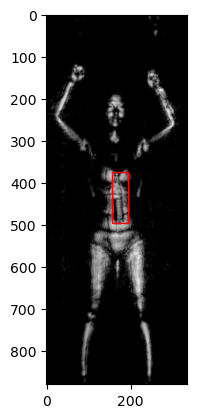

In [87]:
img = cv2.imread(str(img_root / "D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg"))


x1,y1,x2,y2 = 155,375,194	,495
# x1,y1,x2,y2= 412	,103	,540	,231
ax = plt.subplot(111)
ax.imshow(img)
rect = patches.Rectangle((x1, y1), abs(x2-x1), abs(y2-y1), linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [13]:
df[df['labels']==1].describe()

,Unnamed: 0,scores,labels,x1,x2,y1,y2
count,5111.000000,5111.000000,5111.0,5111.000000,5111.000000,5111.000000,5111.000000
mean,5099.270593,0.129203,1.0,533.032479,661.032479,131.632753,259.632753
std,2932.409062,0.070070,0.0,189.149330,189.149330,80.298884,80.298884
min,2.000000,0.000000,1.0,0.000000,128.000000,0.000000,128.000000
25%,2562.500000,0.081899,1.0,412.000000,540.000000,103.000000,231.000000
50%,5089.000000,0.115857,1.0,515.000000,643.000000,103.000000,231.000000
75%,7654.000000,0.158606,1.0,721.000000,849.000000,206.000000,334.000000
max,10221.000000,0.861003,1.0,752.000000,880.000000,207.000000,335.000000


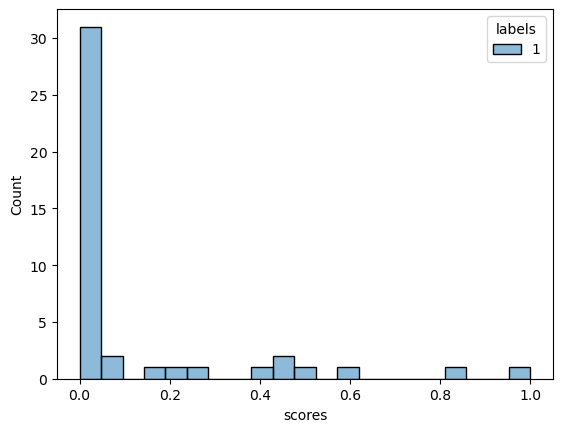

In [8]:
sns.histplot(df[df['labels']==1], x='scores', hue='labels')
plt.show()

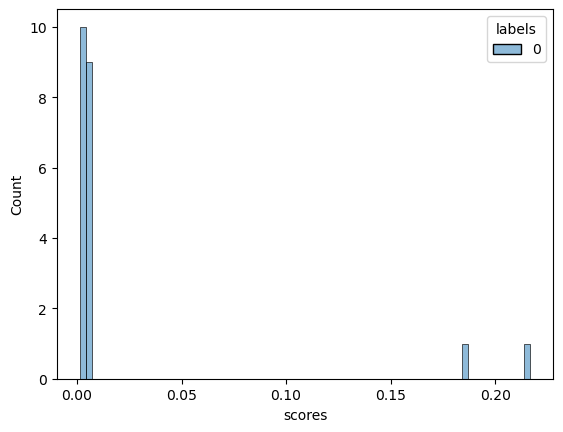

In [9]:
sns.histplot(df[df['labels']==0], x='scores', hue='labels')
plt.show()